## Motivation

Every two years, every member of the United States House of Representatives is up for election. After being elected, members of the House are given a set budget from the legislature itself to hire staff, buy office equipment, and defray other costs of legislating and addressing constituent concerns. While each office gets the same amount of money from Congress to spend on these purposes, congressional offices have discretion over how that allowance is actually spent, and we would like to see whether some spending patterns are associated with higher political success. 

# Getting/Formatting the Data

For this project, we decided to use the [House Office Expenditure Data](https://www.propublica.org/datastore/dataset/house-office-expenditures) from ProPublica as it contains well formatted data about house expenditures from 2009 to 2018. The main downside of this dataset is that it is missing data from the most recent midterm election, but we still have almost 10 years of data to work with.

To programatically access the datasets we are working with, we have included copies here [repository](https://github.com/AndrewTrackim/cmsc320-final/raw/master/house-expenditure/).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# just finna test with one of the files to see what happens
frames = []

#automate the dataframes from 2010 to 2017
for i in range(2010, 2019):
    for j in range(1, 5):
        df = pd.read_csv('./house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',', encoding = 'unicode_escape')
        df.dropna(subset = ['BIOGUIDE_ID'], inplace=True)
        if not {'CATEGORY'}.issubset(df.columns): # For whatever reason, 2018Q2 has its category column mislabeled. 
            df.rename(columns={"SORT SUBTOTAL DESCRIPTION" : "CATEGORY"}, inplace=True)
        df["QUARTER"] = str(i) + 'Q' + str(j)
        frames.append(df)

house_data = pd.concat(frames)
# house_data

<ipython-input-2-39dec3d0e8e7>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',', encoding = 'unicode_escape')
<ipython-input-2-39dec3d0e8e7>:9: DtypeWarning: Columns (2,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./house-expenditure/' + str(i) + 'Q' + str(j) +'-house-disburse-detail.csv', thousands=',', encoding = 'unicode_escape')


[election data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/IG0UN2)

In [3]:
election_data = pd.read_csv('./house-expenditure/1976-2020-house.csv')

# filter out the years before 2009 and after 2018
election_data = election_data[election_data['year'] >= 2009]
election_data = election_data[election_data['year'] <= 2020]

election_data

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
22553,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,False,DAVID WALTER,CONSTITUTION,False,TOTAL,26357,156281,False,20220331,False
22554,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,False,JO BONNER,REPUBLICAN,False,TOTAL,129063,156281,False,20220331,False
22555,2010,ALABAMA,AL,1,63,41,US HOUSE,1,GEN,NaN,False,WRITEIN,NaN,True,TOTAL,861,156281,False,20220331,False
22556,2010,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,NaN,False,BOBBY BRIGHT,DEMOCRAT,False,TOTAL,106865,219028,False,20220331,False
22557,2010,ALABAMA,AL,1,63,41,US HOUSE,2,GEN,NaN,False,MARTHA ROBY,REPUBLICAN,False,TOTAL,111645,219028,False,20220331,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31098,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,False,LYNNETTE GREY BULL,DEMOCRAT,False,TOTAL,66576,278503,False,20220331,False
31099,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,False,OVERVOTES,NaN,False,TOTAL,1274,278503,False,20220331,False
31100,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,False,RICHARD BRUBAKER,LIBERTARIAN,False,TOTAL,10154,278503,False,20220331,False
31101,2020,WYOMING,WY,56,83,68,US HOUSE,0,GEN,False,False,UNDERVOTES,NaN,False,TOTAL,6337,278503,False,20220331,False


Try to figure out what categories we are working with and how these categories should be group into broader categories

In [4]:
from collections import defaultdict
categories = defaultdict(lambda: 0)
def add_set(row):
      categories[row['CATEGORY']] += 1

#apply add_set to the house_data
house_data.apply(add_set, axis = 1)
categories

defaultdict(<function __main__.<lambda>()>,
            {'FRANKED MAIL': 93182,
             'PERSONNEL COMPENSATION': 389946,
             'TRAVEL': 687708,
             'RENT, COMMUNICATION, UTILITIES': 598709,
             'PRINTING AND REPRODUCTION': 133115,
             'OTHER SERVICES': 160797,
             'SUPPLIES AND MATERIALS': 563828,
             'EQUIPMENT': 96115,
             'PERSONNEL BENEFITS': 122,
             'TRANSPORTATION OF THINGS': 513,
             'RENT COMMUNICATION UTILITIES': 18459,
             'RENT  COMMUNICATION  UTILITIES': 152389,
             'BENEFITS TO FORMER PERSONNEL': 5})

In [5]:
replace = {
    'RENT  COMMUNICATION  UTILITIES': 'RENT, COMMUNICATION, UTILITIES',
    'RENT COMMUNICATION UTILITIES': 'RENT, COMMUNICATION, UTILITIES'
}
house_data.replace(to_replace=replace, value=None, inplace=True)

In [6]:
categories = defaultdict(lambda: 0)
def add_set(row):
      categories[row['CATEGORY']] += 1
      
house_data.apply(add_set, axis = 1)
str(categories)

"defaultdict(<function <lambda> at 0x7fb2d2500b80>, {'FRANKED MAIL': 93182, 'PERSONNEL COMPENSATION': 389946, 'TRAVEL': 687708, 'RENT, COMMUNICATION, UTILITIES': 598709, 'PRINTING AND REPRODUCTION': 133115, 'OTHER SERVICES': 160797, 'SUPPLIES AND MATERIALS': 563828, 'EQUIPMENT': 96115, 'PERSONNEL BENEFITS': 122, 'TRANSPORTATION OF THINGS': 513, 'RENT COMMUNICATION UTILITIES': 18459, 'RENT  COMMUNICATION  UTILITIES': 152389, 'BENEFITS TO FORMER PERSONNEL': 5})"

In [7]:
import requests
from bs4 import BeautifulSoup
raw = requests.get("https://www.congress.gov/help/field-values/member-bioguide-ids")
soup = BeautifulSoup(raw.text, 'lxml')
table = soup.find('table')

# Since the entire thing is a formatted table, read it directly into a pandas dataframe
tabledf = pd.read_html(str(table))
tabledf = tabledf[0]
tabledf.dropna(subset = ['Member'], inplace=True)
tabledf.reset_index(drop=True, inplace=True)
members = tabledf['Member'].str.extractall("(.*), (.*) \((.*) - (.*)\)")

members.reset_index(drop=True, inplace=True)
members.rename(columns={0 : 'LASTNAME', 1: "FIRSTNAME", 2: "PARTY", 3: "STATE"}, inplace=True)
members['BIOGUIDE_ID'] = tabledf['Member ID']
members

,LASTNAME,FIRSTNAME,PARTY,STATE,BIOGUIDE_ID
0,Abdnor,James,Republican,South Dakota,A000009
1,Abercrombie,Neil,Democratic,Hawaii,A000014
2,Abourezk,James,Democratic,South Dakota,A000017
3,Abraham,Ralph Lee,Republican,Louisiana,A000374
4,Abraham,Spencer,Republican,Michigan,A000355
...,...,...,...,...,...
2422,Zinke,Ryan K.,Republican,Montana,Z000018
2423,Zion,Roger H.,Republican,Indiana,Z000010
2424,Zorinsky,Edward,Democratic,Nebraska,Z000013
2425,Zschau,Edwin V. W.,Republican,California,Z000014


Here we are importing data on the number of terms each congress member has served, we are being carfull to not count terms served after the period we are analysing.

In [8]:
import datetime

term_data = []
column_names = ['BIOGUIDE_ID','TERMS']

for url in ['https://theunitedstates.io/congress-legislators/legislators-current.json','https://theunitedstates.io/congress-legislators/legislators-historical.json']:
    r = requests.get(url)
    json_data = r.json()

    for json_el in json_data:
        number_of_terms = 0
        for term in json_el['terms']:
            start_date = datetime.datetime.strptime(term['start'], '%Y-%m-%d')
            # Make sure we are not looking at terms served after the period we are analysing
            if start_date.year < 2020:
                number_of_terms += 1
        term_data.append([json_el['id']['bioguide'], len(json_el['terms'])])

us_io_data = pd.DataFrame(term_data, columns=column_names)
us_io_data

,BIOGUIDE_ID,TERMS
0,B000944,10
1,C000127,5
2,C000141,13
3,C000174,9
4,C001070,3
...,...,...
12585,H001088,2
12586,Y000033,25
12587,F000449,9
12588,V000132,5


## k-means

In [9]:
import numpy as np
quarters = house_data['QUARTER'].unique()
categories = house_data['CATEGORY'].unique()

quarter = quarters[4]
hd_by_quarter = house_data[house_data['QUARTER'] == quarter]
bio_ids = hd_by_quarter['BIOGUIDE_ID'].unique()


spending_per_candidate = hd_by_quarter.groupby(['BIOGUIDE_ID','CATEGORY'])['AMOUNT'].sum()
spending_data = []
for bio_id in bio_ids:
    row = [bio_id]
    for category in categories:
        if category in spending_per_candidate[bio_id]:
            row.append(spending_per_candidate[bio_id][category])
        else:
            row.append(0)
    spending_data.append(row)
quarter_spending_df = pd.DataFrame(spending_data,columns = ["BIOGUIDE_ID"] + categories.tolist())
# quarter_spending_df = quarter_spending_df.dropna(axis='columns')
# quarter_spending_df.dropna(subset = ['BIOGUIDE_ID']))
quarter_spending_df
# spending_per_candidate.to_csv('spending_per_candidate_' + quarter + '.csv')

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL
0,A000014,0.00,-16.67,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0,0,0,0
1,A000022,1909.79,221917.86,4408.29,42452.47,3351.43,14544.05,16893.16,29771.60,0,0.0,0,0,0
2,A000366,544.03,153141.65,5278.86,11755.74,3088.08,16290.80,3718.37,1154.26,0,0.0,0,0,0
3,A000055,1596.30,241025.00,10240.27,20557.94,2207.96,31803.95,10611.37,466.50,0,0.0,0,0,0
4,A000364,-1025.59,63958.87,2752.45,1535.46,0.00,75.00,118.85,2500.00,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Y000062,1516.09,251042.50,16880.90,19938.93,3095.85,9820.06,16012.77,1585.11,0,0.0,0,0,0
536,Y000063,915.11,138985.01,9307.80,11831.87,2140.50,9601.80,17129.45,1925.10,0,0.0,0,0,0
537,Y000031,9060.30,225343.06,13973.82,22532.63,2197.04,13195.70,21175.40,8000.64,0,0.0,0,0,0
538,Y000033,1291.25,254234.48,14910.34,53791.82,2991.34,36233.64,27649.41,12792.63,0,0.0,0,0,0


In [10]:
# Left join the spending data with the candidate data
spending_member_info = quarter_spending_df.merge(members, on="BIOGUIDE_ID")
spending_member_info = spending_member_info.merge(us_io_data, on="BIOGUIDE_ID")
spending_member_info

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,LASTNAME,FIRSTNAME,PARTY,STATE,TERMS
0,A000014,0.00,-16.67,0.00,0.00,0.00,0.00,0.00,0.00,0,0.0,0,0,0,Abercrombie,Neil,Democratic,Hawaii,11
1,A000022,1909.79,221917.86,4408.29,42452.47,3351.43,14544.05,16893.16,29771.60,0,0.0,0,0,0,Ackerman,Gary L.,Democratic,New York,15
2,A000366,544.03,153141.65,5278.86,11755.74,3088.08,16290.80,3718.37,1154.26,0,0.0,0,0,0,Adams,Sandy,Republican,Florida,1
3,A000055,1596.30,241025.00,10240.27,20557.94,2207.96,31803.95,10611.37,466.50,0,0.0,0,0,0,Aderholt,Robert B.,Republican,Alabama,13
4,A000364,-1025.59,63958.87,2752.45,1535.46,0.00,75.00,118.85,2500.00,0,0.0,0,0,0,Adler,John H.,Democratic,New Jersey,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Y000062,1516.09,251042.50,16880.90,19938.93,3095.85,9820.06,16012.77,1585.11,0,0.0,0,0,0,Yarmuth,John A.,Democratic,Kentucky,8
536,Y000063,915.11,138985.01,9307.80,11831.87,2140.50,9601.80,17129.45,1925.10,0,0.0,0,0,0,Yoder,Kevin,Republican,Kansas,4
537,Y000031,9060.30,225343.06,13973.82,22532.63,2197.04,13195.70,21175.40,8000.64,0,0.0,0,0,0,Young,C. W. Bill,Republican,Florida,22
538,Y000033,1291.25,254234.48,14910.34,53791.82,2991.34,36233.64,27649.41,12792.63,0,0.0,0,0,0,Young,Don,Republican,Alaska,25


In [11]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
# train, test = train_test_split(spending_member_info[categories], test_size=0.2)
kmeans_model = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
kmeans_trained = kmeans_model.fit(spending_member_info[categories])
# kmeans_trained.cluster_centers_

clusters = kmeans_trained.predict(spending_member_info[categories])
for i in list(set(clusters)):
# i=0
    print("Cluster:",i)
    print(spending_member_info[["STATE","BIOGUIDE_ID","LASTNAME","TERMS"]][clusters==i].to_string())
    print("")
# print(spending_member_info[["PARTY","STATE"]][clusters==i].groupby("STATE").count())

Cluster: 0
                        STATE BIOGUIDE_ID           LASTNAME  TERMS
1                    New York     A000022           Ackerman     15
9                  New Jersey     A000210            Andrews     13
22              New Hampshire     B000220               Bass      7
23                 California     B001270               Bass      6
31                   Illinois     B001232            Biggert      7
33                    Florida     B001257          Bilirakis      8
46                       Guam     B001245           Bordallo      8
52                      Texas     B000755              Brady     13
66             North Carolina     B001251        Butterfield     10
68                 California     C000059            Calvert     15
82                      Texas     C001051             Carter     10
83                  Louisiana     C001075            Cassidy      5
85                    Florida     C001066             Castor      8
92               Rhode Island     C00

In [12]:
print(spending_member_info[["PARTY","LASTNAME","STATE"]][clusters==6].to_string())

          PARTY LASTNAME    STATE
421  Republican   Rogers  Alabama


In [13]:
len(spending_member_info[["PARTY","LASTNAME"]][clusters==1])

92

## K-NN

In [14]:
import numpy as np
quarters = house_data['QUARTER'].unique()
categories = house_data['CATEGORY'].unique()
spending_data = []

for quarter in quarters:
    hd_by_quarter = house_data[house_data['QUARTER'] == quarter]
    bio_ids = hd_by_quarter['BIOGUIDE_ID'].unique()

    spending_per_candidate = hd_by_quarter.groupby(['BIOGUIDE_ID','CATEGORY'])['AMOUNT'].sum()
        
    for bio_id in bio_ids:
        row = [bio_id]
        for category in categories:
            if category in spending_per_candidate[bio_id]:
                row.append(spending_per_candidate[bio_id][category])
            else:
                row.append(0)
        spending_data.append(row)
quarter_spending_df = pd.DataFrame(spending_data,columns = ["BIOGUIDE_ID"] + categories.tolist())
# quarter_spending_df = quarter_spending_df.dropna(axis='columns')
# quarter_spending_df.dropna(subset = ['BIOGUIDE_ID']))
quarter_spending_df
# spending_per_candidate.to_csv('spending_per_candidate_' + quarter + '.csv')

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL
0,A000014,1498.61,259540.31,10891.59,21084.39,43.90,8348.02,4661.75,981.30,0.0,0.0,0.0,0.00,0.0
1,A000022,21011.90,242972.84,3655.22,33422.01,9794.18,21341.00,17776.34,2033.33,0.0,0.0,0.0,0.00,0.0
2,A000055,1671.92,264937.16,10360.45,19145.14,2130.92,11644.95,8005.85,601.50,0.0,0.0,0.0,0.00,0.0
3,A000364,85906.29,199660.40,7925.65,27119.41,75410.20,30479.70,6095.27,3894.33,0.0,0.0,0.0,0.00,0.0
4,A000358,40746.81,259704.20,6721.87,24703.34,45627.10,12367.41,6997.48,3610.12,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16685,Y000063,36106.24,580361.72,28728.74,0.00,1596.72,17184.00,10156.06,712026.36,0.0,0.0,0.0,35312.88,0.0
16686,Y000065,628.52,484520.36,20283.70,0.00,1740.54,12181.12,8469.62,567261.58,0.0,0.0,0.0,36149.72,0.0
16687,Y000066,1651.82,669181.08,42493.52,0.00,26421.46,20618.00,9300.72,844290.08,0.0,0.0,0.0,49822.80,0.0
16688,Y000033,593.56,711857.32,109601.92,0.00,1630.82,20400.00,8808.72,906357.12,0.0,0.0,0.0,43962.62,0.0


In [15]:
# Left join the spending data with the candidate data
spending_member_info = quarter_spending_df.merge(members, on="BIOGUIDE_ID")
spending_member_info = spending_member_info.merge(us_io_data, on="BIOGUIDE_ID")
spending_member_info

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,LASTNAME,FIRSTNAME,PARTY,STATE,TERMS
0,A000014,1498.61,259540.31,10891.59,21084.39,43.90,8348.02,4661.75,981.30,0.0,0.00,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
1,A000014,768.37,140136.13,5114.78,18945.34,124.82,10946.92,3398.35,580.34,0.0,0.00,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
2,A000014,0.00,0.00,0.00,0.00,640.45,2496.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
3,A000014,0.00,-16.67,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
4,A000014,0.00,0.00,-5.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,Abercrombie,Neil,Democratic,Hawaii,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16669,L000588,229.94,312500.04,15252.66,0.00,79.90,21310.00,10330.86,387217.34,0.0,0.00,0.0,23573.94,0.0,Lamb,Conor,Democratic,Pennsylvania,3
16670,L000589,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,Lesko,Debbie,Republican,Arizona,3
16671,L000589,74410.60,409529.56,14309.88,0.00,8175.00,31775.16,5817.34,616515.64,0.0,29.92,0.0,62899.54,0.0,Lesko,Debbie,Republican,Arizona,3
16672,B001306,0.00,67943.08,0.00,0.00,0.00,0.00,139.90,68819.98,0.0,0.00,0.0,-7.00,0.0,Balderson,Troy,Republican,Ohio,3


### K-nn - Predicting party

Issolate just Democratic and Republican members as the other parties don't have enough data to train on.

In [16]:
spending_member_info_2_party_dup_mems = pd.concat([spending_member_info[spending_member_info["PARTY"] == 'Republican'], spending_member_info[spending_member_info["PARTY"] == 'Democratic']])
spending_member_info_2_party_dup_mems["PARTY"].unique()

array(['Republican', 'Democratic'], dtype=object)

In [17]:
spending_member_info_2_party = spending_member_info_2_party_dup_mems.groupby("BIOGUIDE_ID").mean()
spending_member_info_2_party = spending_member_info_2_party.merge(members, on="BIOGUIDE_ID")
spending_member_info_2_party

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,TERMS,LASTNAME,FIRSTNAME,PARTY,STATE
0,A000014,453.396000,79931.954000,3200.274000,8005.946000,161.834000,4358.188000,1612.020000,312.328000,0.0,0.000000,0.000000,0.000000,0.0,11.0,Abercrombie,Neil,Democratic,Hawaii
1,A000022,7788.006667,193373.456667,3442.826000,25562.300667,4367.879333,11344.972667,10127.956667,3913.299333,0.0,62.866667,0.000000,0.000000,0.0,15.0,Ackerman,Gary L.,Democratic,New York
2,A000055,2323.698824,274655.957941,22124.718235,16469.931471,2521.436176,11160.188529,10641.597647,100868.158529,0.0,0.000000,705.911176,8154.512059,0.0,13.0,Aderholt,Robert B.,Republican,Alabama
3,A000210,10945.465714,178926.020952,3494.050476,26119.840476,6882.656667,12245.477143,5025.150000,5005.634762,0.0,0.000000,0.000000,0.000000,0.0,13.0,Andrews,Robert E.,Democratic,New Jersey
4,A000358,13886.653077,214088.965385,6301.306923,20012.550000,9924.551538,8219.811538,3919.610769,1554.232308,0.0,0.000000,0.000000,0.000000,0.0,6.0,Akin,W. Todd,Republican,Missouri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,Y000064,13135.199600,209062.036000,14528.366400,16534.750000,17906.093200,11071.945200,5417.384800,1834.870800,0.0,0.000000,720.305200,50.960400,0.0,4.0,Young,Todd,Republican,Indiana
767,Y000065,5273.216250,229379.347917,14945.385833,11766.831667,8722.397917,11618.326667,7258.794167,119963.705000,0.0,0.000000,646.557500,11860.597917,0.0,4.0,Yoho,Ted S.,Republican,Florida
768,Y000066,12678.770625,261503.966250,18671.642500,11268.490000,9920.765000,14453.676250,9029.865000,196964.341875,0.0,0.437500,1065.680625,19839.546875,0.0,2.0,Young,David,Republican,Iowa
769,Z000017,18271.208125,285211.815000,10044.772500,11260.167500,15052.381250,17001.110625,5216.521875,213126.075625,0.0,160.491875,1848.783750,20877.426250,0.0,4.0,Zeldin,Lee M.,Republican,New York


Here we are making a KNN with default values to see if the model does better than random chance.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(spending_member_info_2_party[categories], spending_member_info_2_party["PARTY"])
knn_model = KNeighborsClassifier()
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

0.6175741076830007

We get an accurary score higher than 50% which looks promising.

We can now try to tune the hyperparameters. Starting with the way points in the k-nn model are weighted. Uniform weighting gives all k nearest points equal weighting, while the distance weighting weighs points by the inverse of their distance. The default weight in scikit learn is uniform so we are testing the distance weighting method.

In [19]:
knn_model = KNeighborsClassifier(weights='distance')
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

0.6210223835450697

It looks like both weighting methods produce very similar accuracies. As a result, we will use the default that scikit learn uses as there is likely good reason it is the default and we do not have a good reason to change it.

Next we are going to look at the number of nearest neighbors and see how that changes our accuracy.

<ipython-input-20-6ea273826c0b>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


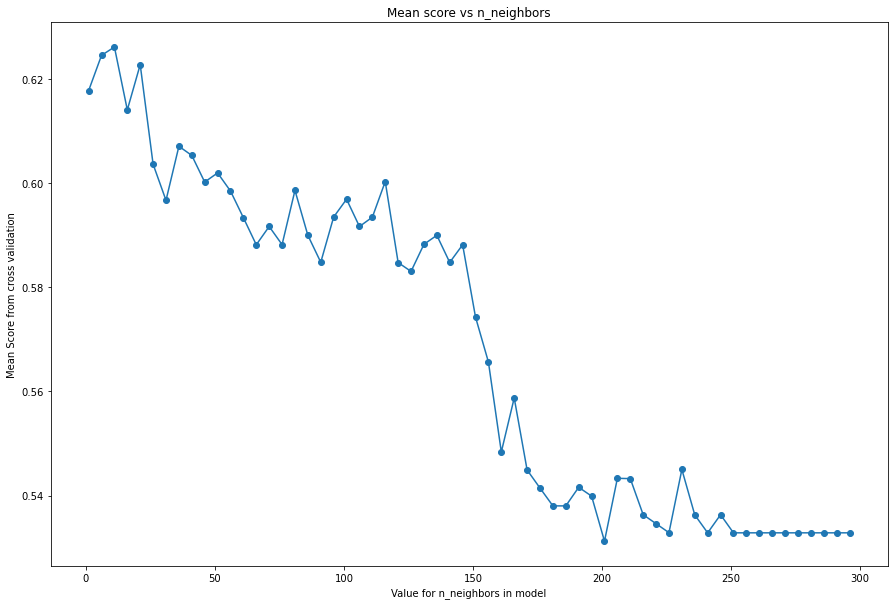

In [20]:
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()
test_k = range(1,300+1,5)
params=[{
    'n_neighbors': test_k,
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()

# Code to change default plot size:
plt.rcParams['figure.figsize'] = [15, 10]

fig, ax = plt.subplots()
ax.plot(test_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()

From the graph it seems like the ideal number of neighbors is in the range between 10 and 50. We can do a grid search of all values in that range to better visualize the space.

<ipython-input-21-be3a5a5042be>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


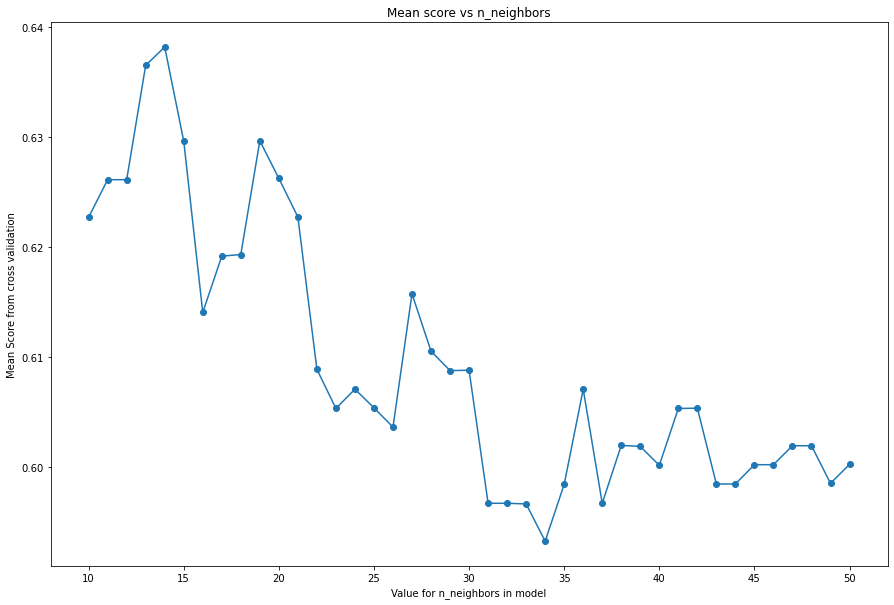

In [21]:
knn_model = KNeighborsClassifier()
test_k = range(10,50+1)
params=[{
    'n_neighbors': test_k,
    # 'weights': ['uniform', 'distance']
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()
tested_k = gs_knn.cv_results_['param_n_neighbors'].tolist()

fig, ax = plt.subplots()
ax.plot(tested_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()


In [22]:
max_score = max(result_k)
index_of_max = result_k.index(max_score)
optimal_k_val = tested_k[index_of_max]
optimal_k_val

14

There seems to be a peak in the data around $k=25$ so that will be the value for k we will use in the final model.

With these hyper parameters set, we can evaulate our model's performance on the test set.

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k_val)
knn_trained = knn_model.fit(x_train, y_train)
knn_model.score(x_test,y_test)

0.6632124352331606

### K-nn - Predicting State

In [24]:
# Verifying we have enough data for each state

# state_count = {}
# for state in spending_member_info["STATE"].unique():
#     state_count[state] = sum(sum([spending_member_info["STATE"] == state]))
# state_count

We have a lot more data for states with more representitives

In [25]:
x_train, x_test, y_train, y_test = train_test_split(spending_member_info_2_party[categories],spending_member_info_2_party["STATE"])
knn_model = KNeighborsClassifier()
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

/home/arjun/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.08133696309739868

We get an accurary score higher than 1/56 which looks promising.

We can now try to tune the hyperparameters. Starting with the way points in the k-nn model are weighted. Uniform weighting gives all k nearest points equal weighting, while the distance weighting weighs points by the inverse of their distance. The default weight in scikit learn is uniform so we are testing the distance weighting method.

In [26]:
knn_model = KNeighborsClassifier(weights='distance')
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

/home/arjun/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.07800967937084088

It looks like both weighting methods produce very similar accuracies. As a result, we will use the default that scikit learn uses as there is likely good reason it is the default and we do not have a good reason to change it.

Next we are going to look at the number of nearest neighbors and see how that changes our accuracy.

/home/arjun/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
<ipython-input-27-210daaf7f6d5>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


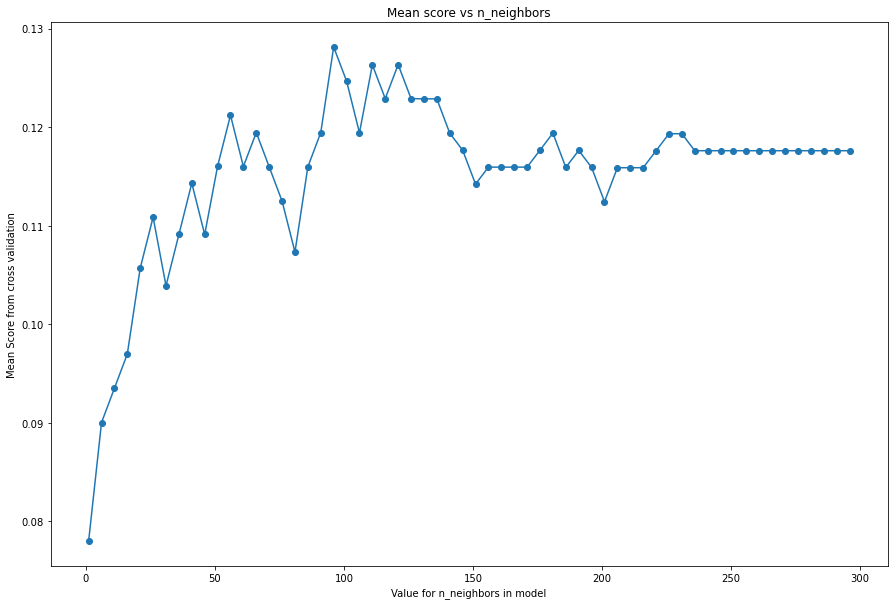

In [27]:
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()
test_k = range(1,300+1,5)
params=[{
    'n_neighbors': test_k,
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()

fig, ax = plt.subplots()
ax.plot(test_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()

From the graph it seems like the ideal number of neighbors is in the range between 25 and 75. We can do a grid search of all values in that range to better visualize the space.

/home/arjun/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
<ipython-input-28-acdff45cd34f>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


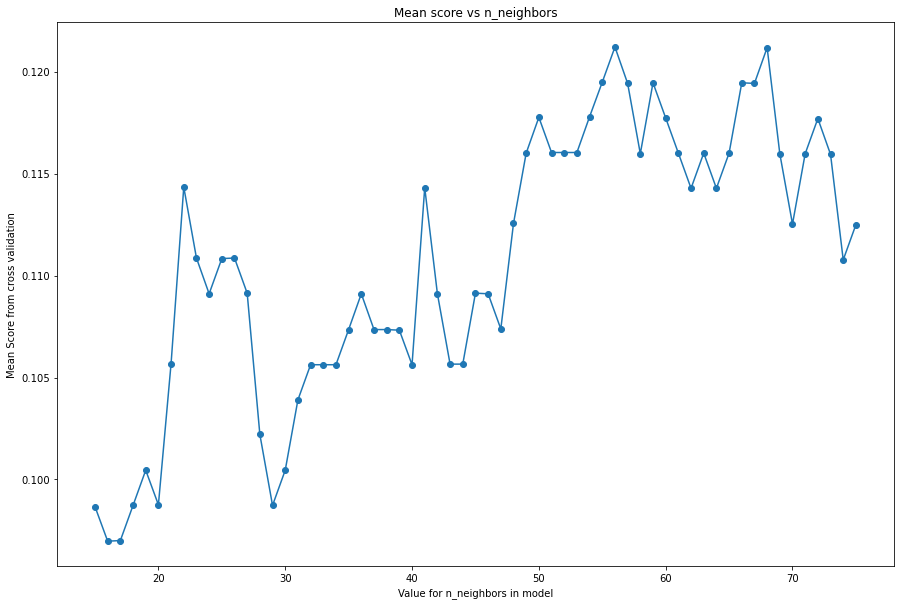

In [28]:
knn_model = KNeighborsClassifier()
test_k = range(15,75+1)
params=[{
    'n_neighbors': test_k,
    # 'weights': ['uniform', 'distance']
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()
tested_k = gs_knn.cv_results_['param_n_neighbors'].tolist()

fig, ax = plt.subplots()
ax.plot(tested_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()


In [29]:
max_score = max(result_k)
index_of_max = result_k.index(max_score)
optimal_k_val = tested_k[index_of_max]
optimal_k_val

56

There seems to be a peak in the data around $k = 52$ so that will be the value for k we will use in the final model.

With these hyper parameters set, we can evaulate our model's performance on the test set.

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k_val)
knn_trained = knn_model.fit(x_train, y_train)
knn_model.score(x_test,y_test)

0.10362694300518134

This is a suprisingly high amount of accuracy. I believe this is actually a result of candidates having similar spending patterns over time, and since a canditate is likely to serve multiple terms for their state it makes sense that we can can predict state from spending patterns. To test this theory, I will see if we can predict a candidate based on their spending.

### K-nn - Candidate

In [31]:
bio_count = {}
for bio_id in spending_member_info["BIOGUIDE_ID"].unique():
    bio_count[bio_id] = sum(sum([spending_member_info["BIOGUIDE_ID"] == bio_id]))
bio_count

{'A000014': 5,
 'A000022': 15,
 'A000055': 34,
 'A000364': 6,
 'A000358': 13,
 'A000361': 18,
 'A000362': 14,
 'A000210': 21,
 'A000363': 6,
 'A000365': 16,
 'B001234': 14,
 'B001256': 24,
 'B000013': 25,
 'B001229': 7,
 'B001230': 14,
 'B001239': 6,
 'B001252': 22,
 'B000208': 14,
 'B000213': 34,
 'B001253': 9,
 'B000287': 31,
 'B001231': 16,
 'B000410': 16,
 'B000420': 8,
 'B001232': 12,
 'B000461': 15,
 'B001257': 34,
 'B001250': 34,
 'B000490': 34,
 'B001242': 23,
 'B001243': 34,
 'B000574': 34,
 'B000575': 5,
 'B001263': 9,
 'B000589': 25,
 'B001244': 20,
 'B001228': 15,
 'B001236': 8,
 'B001245': 34,
 'B001254': 15,
 'B000652': 16,
 'B000657': 7,
 'B001255': 28,
 'B000716': 5,
 'B000755': 34,
 'B001227': 34,
 'B001259': 22,
 'B001264': 6,
 'B001262': 22,
 'B001247': 6,
 'B000911': 29,
 'B001235': 5,
 'B001260': 34,
 'B001248': 34,
 'B001149': 16,
 'B001251': 34,
 'B001203': 7,
 'C000059': 34,
 'C000071': 23,
 'C001064': 21,
 'C001046': 24,
 'C001079': 7,
 'C001047': 23,
 'C001036

In [32]:
spending_member_info_candidates_arr = []
for bio_id in spending_member_info["BIOGUIDE_ID"].unique():
    count = sum(sum([spending_member_info["BIOGUIDE_ID"] == bio_id]))
    if count > 20:
        spending_member_info_candidates_arr.append(spending_member_info[spending_member_info["BIOGUIDE_ID"] == bio_id])
spending_member_info_candidates = pd.concat(spending_member_info_candidates_arr)
len(spending_member_info_candidates["BIOGUIDE_ID"].unique())

415

In [33]:
x_train, x_test, y_train, y_test = train_test_split(spending_member_info_candidates[categories],spending_member_info_candidates["BIOGUIDE_ID"])
knn_model = KNeighborsClassifier()
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

0.05177824267782427

In [34]:
knn_model = KNeighborsClassifier(weights='distance')
knn_trained = knn_model.fit(x_train, y_train)
cross_val_score(knn_trained, x_train, y_train, cv=10).mean()

0.06202928870292888

<ipython-input-35-7f69219a2088>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


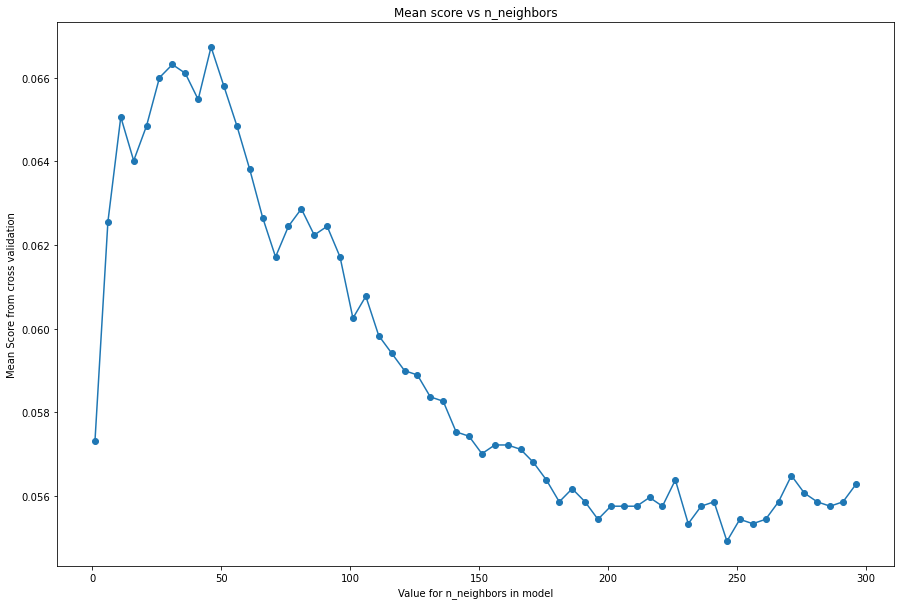

In [35]:
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier(weights='distance')
test_k = range(1,300+1,5)
params=[{
    'n_neighbors': test_k,
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()

fig, ax = plt.subplots()
ax.plot(test_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()

<ipython-input-36-540ada2706f5>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


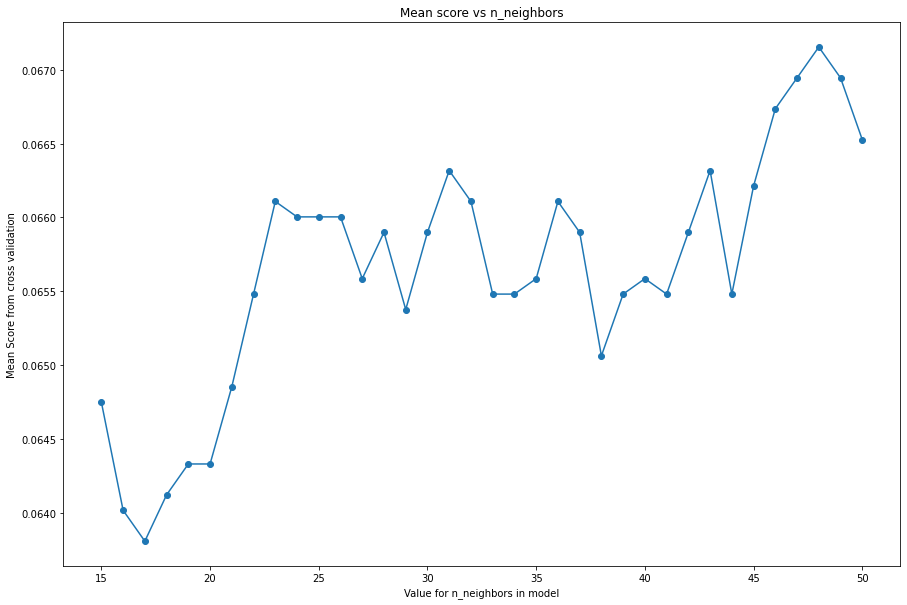

In [36]:
knn_model = KNeighborsClassifier(weights='distance')
test_k = range(15,50+1)
params=[{
    'n_neighbors': test_k,
    # 'weights': ['uniform', 'distance']
}]
gs_knn = GridSearchCV(knn_model, param_grid=params, cv=10, n_jobs=-1)
gs_knn.fit(x_train, y_train)
result_k = gs_knn.cv_results_['mean_test_score'].tolist()
tested_k = gs_knn.cv_results_['param_n_neighbors'].tolist()

fig, ax = plt.subplots()
ax.plot(tested_k, result_k, '-o')
ax.set_xlabel("Value for n_neighbors in model")
ax.set_ylabel("Mean Score from cross validation")
ax.set_title("Mean score vs n_neighbors")
fig.show()


In [37]:
max_score = max(result_k)
index_of_max = result_k.index(max_score)
optimal_k_val = tested_k[index_of_max]
optimal_k_val

48

In [38]:
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=optimal_k_val)
knn_trained = knn_model.fit(x_train, y_train)
knn_model.score(x_test,y_test)

0.060244744273611546

Indicitive of clustering based on candidate expenditure

I should try to remake the first 2 models but with only 1 data point for each candidate

In [77]:
import re
candidate_election_res = []
spending_election_df = spending_member_info_2_party.copy()
for index, row in spending_election_df.iterrows():
    candidate_res = (election_data[election_data['candidate'].str.contains(row['LASTNAME'], flags=re.IGNORECASE) & election_data['state'].str.contains(row['STATE'], flags=re.IGNORECASE)])
    if not candidate_res.empty:
        spending_election_df.loc[index, 'FIRST_ELECTED'] = candidate_res['year'].max() - int((row['TERMS'] - 1) * 2)

spending_election_df.dropna(subset=['FIRST_ELECTED'], inplace=True)

spending_election_df = spending_election_df[spending_election_df['FIRST_ELECTED'] >= 2010]
spending_election_df

,BIOGUIDE_ID,FRANKED MAIL,PERSONNEL COMPENSATION,TRAVEL,"RENT, COMMUNICATION, UTILITIES",PRINTING AND REPRODUCTION,OTHER SERVICES,SUPPLIES AND MATERIALS,EQUIPMENT,PERSONNEL BENEFITS,TRANSPORTATION OF THINGS,RENT COMMUNICATION UTILITIES,RENT COMMUNICATION UTILITIES,BENEFITS TO FORMER PERSONNEL,TERMS,LASTNAME,FIRSTNAME,PARTY,STATE,FIRST_ELECTED
8,A000364,21911.470000,104002.581667,4466.935000,13644.785000,24247.825000,8708.440000,2729.533333,2411.126667,0.0,0.000000,0.000000,0.000000,0.0,1.0,Adler,John H.,Democratic,New Jersey,2012
10,A000366,16253.856364,147577.518182,4433.100909,11251.666364,21953.159091,10552.740909,5559.957273,3226.480000,0.0,0.000000,0.000000,0.000000,0.0,1.0,Adams,Sandy,Republican,Florida,2010
11,A000369,3810.770000,243884.005517,21816.387931,19903.660690,5892.463103,13338.815517,8769.383793,109004.702759,0.0,0.000000,997.587931,10567.985862,0.0,6.0,Amodei,Mark E.,Republican,Nevada,2010
12,A000370,4912.033125,272959.023125,15426.087500,11940.830625,8623.924375,9639.182500,11765.594375,217315.435000,0.0,0.000000,1815.925000,17222.992500,0.0,5.0,Adams,Alma S.,Democratic,North Carolina,2012
13,A000371,5023.990667,293521.698667,24041.072000,15110.126667,15093.201333,11707.407333,9976.879333,233284.992667,0.0,0.000000,1433.760000,24312.718000,0.0,4.0,Aguilar,Pete,Democratic,California,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,Y000063,18861.793125,223838.909688,15955.307812,20616.562813,28259.841250,11812.800625,6420.356250,97450.311562,0.0,0.000000,500.287188,7764.575313,0.0,4.0,Yoder,Kevin,Republican,Kansas,2012
767,Y000065,5273.216250,229379.347917,14945.385833,11766.831667,8722.397917,11618.326667,7258.794167,119963.705000,0.0,0.000000,646.557500,11860.597917,0.0,4.0,Yoho,Ted S.,Republican,Florida,2012
768,Y000066,12678.770625,261503.966250,18671.642500,11268.490000,9920.765000,14453.676250,9029.865000,196964.341875,0.0,0.437500,1065.680625,19839.546875,0.0,2.0,Young,David,Republican,Iowa,2018
769,Z000017,18271.208125,285211.815000,10044.772500,11260.167500,15052.381250,17001.110625,5216.521875,213126.075625,0.0,160.491875,1848.783750,20877.426250,0.0,4.0,Zeldin,Lee M.,Republican,New York,2014


Here we have the spending dataframe from before, but now with the election data added. The "FIRST_ELECTED" column contains the election in which each member of the House was first elected. Since we are only concerned with evaluating the spending patterns of new cohorts of members of Congress, we need to have spending data for their entire congressional tenure - meaning that we need to drop any rows where "FIRST_ELECTED" is NaN (since these people were elected before 2010 and not subsequently re-elected), and any members whose first term started before 2010. 